Graficke znazorneni viz email nahraji behem dne


In [140]:
import numpy as np
from scipy import stats as sc
import matplotlib.pyplot as plt
import pandas as pd
import UQpy
from UQpy.surrogates import *
from UQpy.distributions import Uniform, JointIndependent, Normal
from UQpy.surrogates.polynomial_chaos.polynomials.baseclass.Polynomials import Polynomials
from colorama import Fore, Style
from scipy.stats import lognorm
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from scipy import stats as sc
import matplotlib.pyplot as plt
import pandas as pd
import UQpy
from UQpy.surrogates import *
from UQpy.distributions import Uniform, JointIndependent, Normal, Lognormal
from colorama import Fore, Style
from scipy.stats import lognorm
from scipy.stats import norm
from colorama import Fore, Style
import numpy as np
from UQpy.sensitivity import *
import math
from termcolor import colored



In [142]:
#Nastaveni kodu
nsim=200 #Pocet simulci se kterimi PCE pracuje
target_error = 1
CheckOverfitting = True
least_squares = LeastSquareRegression()

In [144]:
# Načtení dat
df = pd.read_csv('Oakwood(3).csv')
df.head()
print(df.shape)
df_split = df.iloc[:, 0].str.split(";", expand=True)
input_names = [
    "Ec", "Rel", "Erat_1", "E50_1", "c_1", "phi_1", "k0_1",
    "Erat_2", "E50_2", "c_2", "phi_2", "k0_2"
]
output_names = [
    "U_251_1", "U_260_1", "U_281_1", "U_289_1", "U_295_1", "U_403_1",
    "U_251_2", "U_260_2", "U_281_2", "U_289_2", "U_295_2", "U_403_2",
    "U_320_19.2", "U_318_19.2", "U_316_19.2", "U_315_19.2", "U_314_19.2",
    "U_313_19.2", "U_312_19.2", "U_311_19.2", "U_310_19.2", "U_308_19.2", "U_306_19.2"
]
all_names = input_names + output_names
df_split.columns = all_names
df_float = df_split.astype(float)
df_float

(1000, 1)


,Ec,Rel,Erat_1,E50_1,c_1,phi_1,k0_1,Erat_2,E50_2,c_2,phi_2,k0_2,U_251_1,U_260_1,U_281_1,U_289_1,U_295_1,U_403_1,U_251_2,U_260_2,U_281_2,U_289_2,U_295_2,U_403_2,U_320_19.2,U_318_19.2,U_316_19.2,U_315_19.2,U_314_19.2,U_313_19.2,U_312_19.2,U_311_19.2,U_310_19.2,U_308_19.2,U_306_19.2
0,12.5,52.85,2.21,73.9,21.6,29.7,0.619,2.79,135,4.29,43.1,0.578,0,0.0025,-0.003142001,-0.008818923,-0.003730774,-0.005975863,-0.002951111,-0.008701589,-0.006160341,-0.000475029,0.000129388,3.09455e-05,-0.000112734,-0.003065491,-0.010105574,-0.01601224,-0.023663873,-0.027769601,-0.02439892,-0.017712398,-0.011355363,-0.003574874,-0.000301941
1,13.5,46.3,2.37,59.6,30.9,30.5,0.983,2.02,140,3.77,42,0.474,0,0.0025,-0.004041582,-0.010328863,-0.006064639,-0.008294756,-0.004313193,-0.010225962,-0.007086138,-0.001149651,-0.000575201,-0.001204412,7.09166e-05,-0.003405942,-0.011466128,-0.017314358,-0.025439935,-0.029641237,-0.026036538,-0.018946083,-0.012233509,-0.00332044,-1.50469e-05
2,12.4,43.72,2.96,76.7,31.1,30,1,2.84,138,6.48,41.5,0.588,0,0.0025,-0.001990467,-0.008265319,-0.003310086,-0.005630256,-0.002361054,-0.008763335,-0.00642995,-0.000353741,0.000274361,0.000194089,-0.00031565,-0.003434344,-0.010287168,-0.015513605,-0.022710303,-0.026571017,-0.023540506,-0.01736404,-0.011220669,-0.003486207,-0.000450857
3,13.6,37.05,2.41,63.7,23.4,30.6,1.05,2.42,124,4.09,42.5,0.635,0,0.0025,-0.001341314,-0.00801611,-0.003263626,-0.006256446,-0.002646797,-0.009217994,-0.006852491,-0.000643033,-5.30637e-05,-0.00049233,-0.000571036,-0.003680728,-0.01021376,-0.015210167,-0.022035312,-0.025780026,-0.0229479,-0.01711478,-0.011133869,-0.003708208,-0.000712157
4,13.6,65.04,2.32,63.5,32.8,32.1,0.995,2.99,132,5.64,40.3,0.614,0,0.0025,-0.001815937,-0.008099974,-0.003117463,-0.00552582,-0.002091393,-0.00843228,-0.006105813,-0.000130602,0.000442073,0.000293227,-0.000319772,-0.003319032,-0.009897786,-0.014986021,-0.021960888,-0.025761886,-0.02284313,-0.016860448,-0.01087175,-0.003410951,-0.000469298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14.4,52.39,2.24,64.4,30.3,29.8,1.02,2.05,140,4.55,42.5,0.591,0,0.0025,-0.002113569,-0.008702792,-0.004159897,-0.006953309,-0.002982935,-0.009228829,-0.006553588,-0.000479344,7.24009e-05,-0.000510313,-0.000282935,-0.003371233,-0.010173674,-0.015324138,-0.022458833,-0.02630529,-0.023268955,-0.017117519,-0.011038918,-0.003353225,-0.000399159
996,15.1,30.34,2.71,64.6,34.3,32.5,0.715,2.4,135,3.75,40,0.478,0,0.002,-0.004694126,-0.010392555,-0.00589027,-0.007822416,-0.003902249,-0.009169922,-0.006008301,-0.000567277,-7.13883e-05,-0.000570207,0.000315451,-0.002791445,-0.010587257,-0.016700316,-0.024830984,-0.029139834,-0.025445893,-0.018286223,-0.011634263,-0.003057931,0.000175895
997,12.6,43.7,2.45,59.9,30.9,28.9,0.935,2.64,137,5.58,42.3,0.454,0,0.0025,-0.004302066,-0.010209887,-0.005689796,-0.00737868,-0.003735158,-0.009695243,-0.006656318,-0.000851237,-0.000254951,-0.000540828,0.000169703,-0.003224975,-0.011361365,-0.017310843,-0.025535762,-0.029794868,-0.026140284,-0.018957015,-0.012191231,-0.003218507,6.27629e-05
998,12.1,32.16,2.48,56.6,34.3,31.9,0.906,2.49,141,6.03,40.5,0.56,0,0.0025,-0.002696938,-0.008856129,-0.003991605,-0.006313226,-0.002978441,-0.009147737,-0.00651729,-0.000496363,0.000144538,-7.01684e-05,-0.0001658,-0.003326405,-0.010511049,-0.016034937,-0.023617843,-0.0276224,-0.024356758,-0.017809134,-0.011473358,-0.003437471,-0.000294552


In [146]:
input_distributions = [
    # Obecné parametry
    Normal(loc=13, scale=1),         # Econc (GPa) - nyní přímo normální rozdělení
    Uniform(loc=30, scale=40),       # Relaxation % (30-70%)
    
    # Vrstva zeminy 1
    Uniform(loc=2, scale=1),         # E/E50 (2-3)
    Normal(loc=65, scale=5),         # E50 (kPa)
    Normal(loc=30, scale=5),         # c' (kPa)
    Normal(loc=30, scale=1),         # φ' (deg)
    Uniform(loc=0.6, scale=0.5),    # ko (0.6-1.1)
    
    # Vrstva zeminy 2
    Uniform(loc=2, scale=1),         # E/E50 (2-3)
    Normal(loc=130, scale=10),       # E50 (kPa)
    Normal(loc=5, scale=1),          # c' (kPa)
    Normal(loc=42, scale=1),         # φ' (deg)
    Uniform(loc=0.45, scale=0.2)     # ko (0.45-0.65)
]
joint = JointIndependent(marginals=input_distributions)

In [148]:
df_float = df_float.apply(pd.to_numeric, errors='coerce')
mean_values = []
std_deviations = []
for column in df_float.columns:
    values = df_float[column]
    
    # Výpočet průměru a směrodatné odchylky
    mean_val = np.mean(values)
    std_dev = np.std(values, ddof=1) 
    mean_values.append(mean_val)
    std_deviations.append(std_dev)
results_df = pd.DataFrame({
    'Sloupec': df_float.columns,
    'Průměr': mean_values,
    'Směrodatná odchylka': std_deviations
})
print(results_df)

       Sloupec           Průměr  Směrodatná odchylka
0           Ec          13.0005         0.9997545995
1          Rel         49.99998          11.55258823
2       Erat_1              2.5          0.288848461
3        E50_1          64.9984          5.008614945
4          c_1          30.0001          5.004931501
5        phi_1          30.0006           1.00053021
6         k0_1             0.85         0.1444218046
7       Erat_2              2.5          0.288848461
8        E50_2         129.9915           10.0184943
9          c_2         4.998302          1.004635383
10       phi_2               42           1.00147039
11        k0_2         0.549997        0.05777702983
12     U_251_1            5e-07       1.58113883e-05
13     U_260_1        0.0024675      0.0001473616825
14     U_281_1  -0.003076527925      0.0009801302642
15     U_289_1  -0.009189028915      0.0007994842248
16     U_295_1  -0.004458261751      0.0009865611286
17     U_403_1  -0.006868427892      0.0008392

In [150]:
# Rozdeleni souboru na dva vstupy a vystupy
df = df_float
first_u_col = df.columns[df.columns.str.startswith('U_')][0]
param_columns = df.columns[:df.columns.get_loc(first_u_col)]
df_params = df[param_columns]
df_u = df.loc[:, first_u_col:] 
 
df_params = df_params.astype(float) # Hodnoty vstupu pouze
df_u = df_u.astype(float) # Hodnoty vystupu pouze
#print(df_params)
#print(df_u.head)

#df_params.to_csv('parameters.csv', index=False)
#df_u.to_csv('u_values.csv', index=False)

        column  p   q  LOO_best  Val_best         mean_PCE         std_PCE   LOO_LAR  LOO_full   Val_LAR  Val_full
0      U_251_1  1   1         0         0                0               0       NaN       NaN       NaN       NaN
1      U_260_1  2   1 0.3836418 0.2237307   0.002470003065 0.0001294839018 0.3968768 1.1591654 0.2473456  0.130026
2      U_281_1  3 0.8 0.0020605 0.0015613  -0.003074239597 0.0009918913328 0.0020678 0.0055777 0.0016239 0.0007597
3      U_289_1  4 0.6 0.0022247 0.0015215  -0.009187475242 0.0008025605257 0.0022247 0.0064468 0.0015215 0.0008568
4      U_295_1  4 0.6 0.0021901 0.0015637  -0.004456160343 0.0009824791989 0.0021901 0.0064311 0.0015637 0.0008388
5      U_403_1  3 0.8  0.001597  0.001208  -0.006868346358  0.000836055423 0.0016067 0.0047274 0.0011909 0.0006308
6      U_251_2  2   1 0.0019902 0.0013897  -0.003401338429 0.0007111106743 0.0020232 0.0053796 0.0015181 0.0007427
7      U_260_2  3 0.8 0.0019287 0.0013788   -0.00940725042 0.0006336946171 0.002

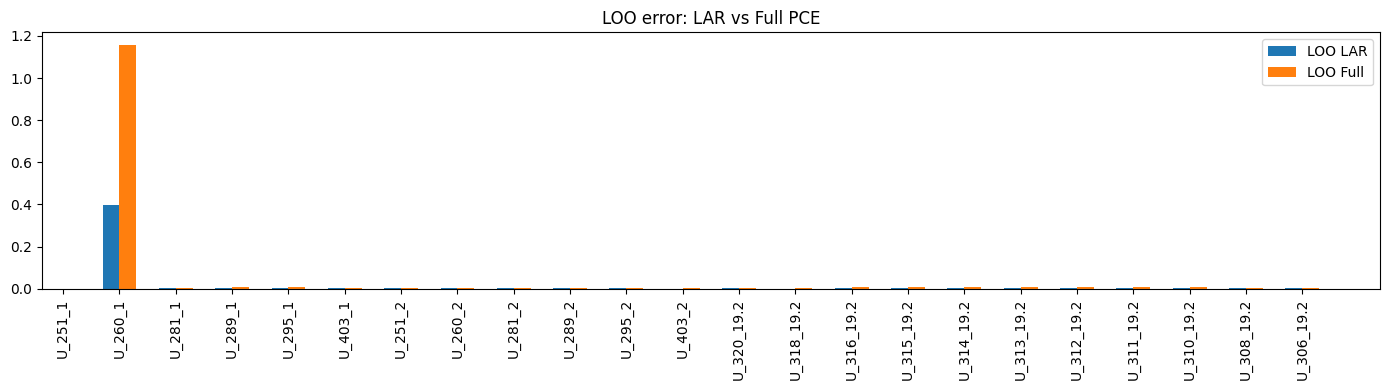

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from UQpy.surrogates import PolynomialChaosExpansion, TotalDegreeBasis
from UQpy.sensitivity import PceSensitivity

n_sim = nsim
n_cols = len(df_u.columns)

# Inicializace struktur
best_error = np.full(n_cols, np.nan)
best_val_error = np.full(n_cols, np.nan)
best_mean = np.full(n_cols, np.nan)
best_std = np.full(n_cols, np.nan)
best_params = [None] * n_cols
sobol_first = [None] * n_cols
sobol_total = [None] * n_cols

# Pro srovnání LAR vs Full PCE
err_lar = np.full(n_cols, np.nan)
err_full = np.full(n_cols, np.nan)
val_lar = np.full(n_cols, np.nan)
val_full = np.full(n_cols, np.nan)

for i, col in enumerate(df_u.columns):
    X = df_params.iloc[:n_sim].values
    Y = df_u.iloc[:n_sim, i].values.reshape(-1, 1)

    # Konstantní výstup
    if np.all(Y == Y[0]):
        best_params[i] = (1, 1.0)
        best_error[i] = best_val_error[i] = 0.0
        best_mean[i] = float(Y[0])
        best_std[i] = 0.0
        sobol_first[i] = sobol_total[i] = np.zeros(X.shape[1])
        continue

    best_err = np.inf
    best_model = None

    for p in range(2, 6):
        for q in [0.6, 0.8, 1.0]:
            try:
                basis = TotalDegreeBasis(joint, p, hyperbolic=q)
                basis_size = basis.polynomials_number  # ✅ správná velikost báze v UQpy :contentReference[oaicite:1]{index=1}

                if basis.polynomials_number >= 0.9 * len(X):  # Konzervativnější prah
                    continue

                pce = PolynomialChaosExpansion(polynomial_basis=basis, regression_method=least_squares)
                pce.fit(X, Y)

                # LAR regression
                try:
                    from UQpy.surrogates.polynomial_chaos.regressions import LeastAngleRegression
                    lar = LeastAngleRegression.model_selection(pce, target_error, CheckOverfitting)
                    e_lar = lar.leaveoneout_error()
                    v_lar = lar.validation_error(X, Y)
                except:
                    e_lar = np.inf; v_lar = np.inf

                # Full PCE
                try:
                    e_full = pce.leaveoneout_error()
                    v_full = pce.validation_error(X, Y)
                except:
                    e_full = np.inf; v_full = np.inf

                # Ukládání pro srovnání
                err_lar[i] = e_lar if np.isfinite(e_lar) else np.nan
                err_full[i] = e_full if np.isfinite(e_full) else np.nan
                val_lar[i] = v_lar if np.isfinite(v_lar) else np.nan
                val_full[i] = v_full if np.isfinite(v_full) else np.nan

                # Volba lepšího modelu
                chosen, e = (lar, e_lar) if e_lar < e_full else (pce, e_full)
                if np.isfinite(e) and e < best_err:
                    best_err = e
                    best_model = chosen
                    best_params[i] = (p, q)
                    best_error[i] = e
                    best_val_error[i] = v_lar if chosen is lar else v_full

            except Exception as exc:
                print(f"  Chyba p={p}, q={q} → {exc}")
                continue

    if best_model is not None:
        m, v = best_model.get_moments()
        best_mean[i] = float(m)
        best_std[i] = float(np.sqrt(v))
        sens = PceSensitivity(best_model); sens.run()
        sobol_first[i] = sens.first_order_indices
        sobol_total[i] = sens.total_order_indices
    else:
        print(f"⚠️ Pro {col} nebyl nalezen žádný stabilní model.")

# Výsledkový DataFrame
results = pd.DataFrame({
    'column': df_u.columns,
    'p': [bp[0] if bp else None for bp in best_params],
    'q': [bp[1] if bp else None for bp in best_params],
    'LOO_best': best_error,
    'Val_best': best_val_error,
    'mean_PCE': best_mean,
    'std_PCE': best_std,
    'LOO_LAR': err_lar,
    'LOO_full': err_full,
    'Val_LAR': val_lar,
    'Val_full': val_full
})
print(results)

# Vizualizace LOO chyb
x = np.arange(n_cols)
w = 0.3
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
ax.bar(x - w/2, err_lar, w, label='LOO LAR')
ax.bar(x + w/2, err_full, w, label='LOO Full')
ax.set_xticks(x)
ax.set_xticklabels(df_u.columns, rotation=90)
ax.set_title('LOO error: LAR vs Full PCE')
ax.legend()
plt.tight_layout()
plt.show()


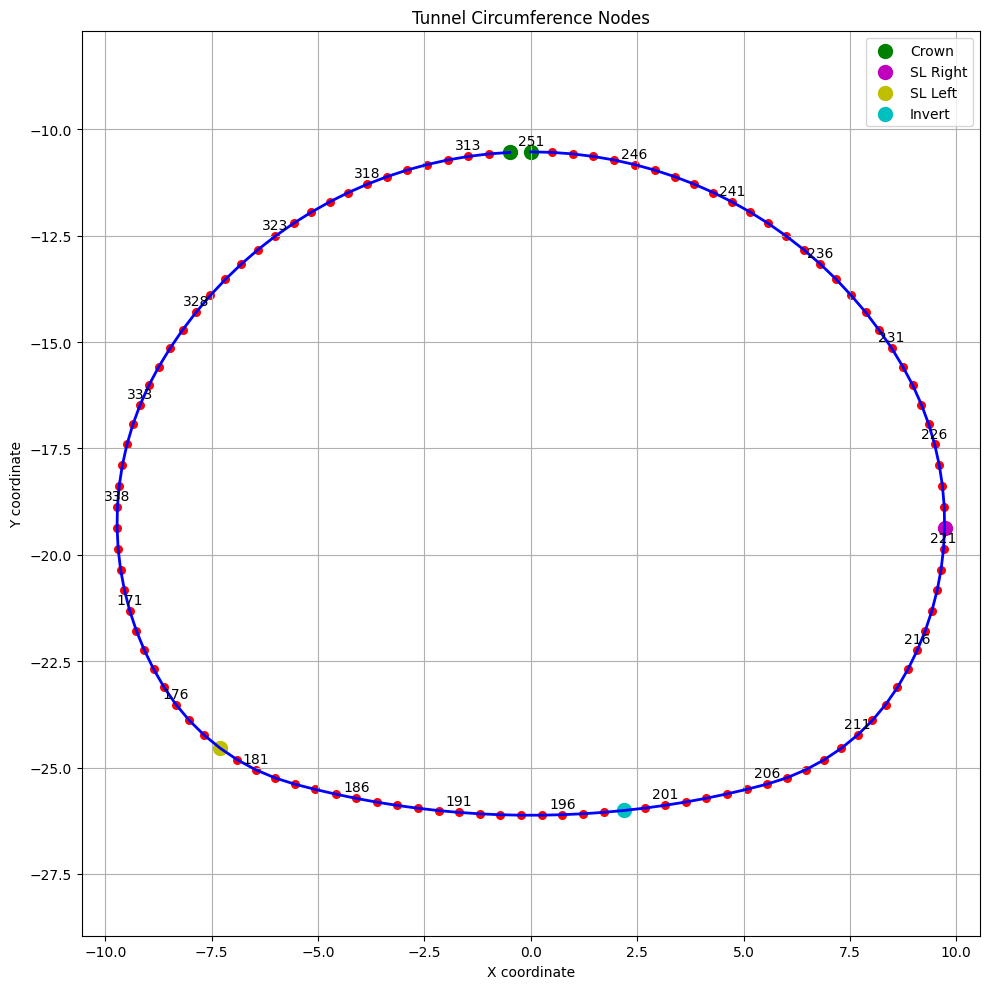

In [153]:
#vykresleni
nodes = [
    (0, -10.5275), (0.492, -10.5395), (0.983, -10.5755), (1.4719, -10.6353),
    (1.95708, -10.719), (2.43761, -10.8261), (2.91235, -10.9566), (3.38016, -11.1101),
    (3.83994, -11.2861), (4.29059, -11.4844), (4.73104, -11.7044), (5.16024, -11.9456),
    (5.57717, -12.2075), (6.00215, -12.505), (6.41129, -12.824), (6.80351, -13.1636),
    (7.17776, -13.5229), (7.53, -13.901), (7.87, -14.2968), (8.18, -14.7093),
    (8.48, -15.1374), (8.74685, -15.58), (8.97931, -16.0164), (9.18182, -16.4675),
    (9.35346, -16.9312), (9.49344, -17.4055), (9.60113, -17.8881), (9.67604, -18.3768),
    (9.71783, -18.8695), (9.7263, -19.3639), (9.70142, -19.8578), (9.64331, -20.3488),
    (9.55222, -20.8348), (9.42857, -21.3136), (9.27246, -21.7842), (9.08488, -22.2431),
    (8.86671, -22.6884), (8.61894, -23.1179), (8.34143, -23.5199), (8.02741, -23.8942),
    (7.67966, -24.2374), (7.30124, -24.5464), (6.89548, -24.8185), (6.46599, -25.0513),
    (6.01653, -25.2428), (5.55109, -25.3913), (5.07787, -25.5123), (4.60202, -25.6225),
    (4.12377, -25.7219), (3.6434, -25.8104), (3.16338, -25.8875), (2.68174, -25.9538),
    (2.19873, -26.0091), (1.71458, -26.0534), (1.22955, -26.0868), (0.744, -26.1092),
    (0.258, -26.1205), (-0.228, -26.1209), (-0.714, -26.1102), (-1.20007, -26.0885),
    (-1.68514, -26.0558), (-2.16935, -26.0121), (-2.65244, -25.9574), (-3.13417, -25.8919),
    (-3.61429, -25.8154), (-4.10204, -25.7262), (-4.58759, -25.6257), (-5.07, -25.5141),
    (-5.55, -25.3913), (-6.01653, -25.2428), (-6.47, -25.0513), (-6.90, -24.8185),
    (-7.30124, -24.5464), (-7.67966, -24.2374), (-8.02741, -23.8942), (-8.34143, -23.5199),
    (-8.61894, -23.1179), (-8.86671, -22.6884), (-9.08488, -22.2431), (-9.27246, -21.7842),
    (-9.42857, -21.3136), (-9.55222, -20.8348), (-9.64331, -20.3488), (-9.70142, -19.8578),
    (-9.7263, -19.3639), (-9.71783, -18.8695), (-9.67604, -18.3768), (-9.60113, -17.8881),
    (-9.49344, -17.4055), (-9.35346, -16.9312), (-9.18182, -16.4675), (-8.97931, -16.0164),
    (-8.74685, -15.58), (-8.47618, -15.1374), (-8.18314, -14.7093), (-7.86849, -14.2968),
    (-7.53307, -13.901), (-7.17776, -13.5229), (-6.80351, -13.1636), (-6.41129, -12.824),
    (-6.00215, -12.505), (-5.57717, -12.2075), (-5.16024, -11.9456), (-4.73104, -11.7044),
    (-4.29059, -11.4844), (-3.83994, -11.2861), (-3.38016, -11.1101), (-2.91235, -10.9566),
    (-2.43761, -10.8261), (-1.95708, -10.719), (-1.4719, -10.6353), (-0.983, -10.5755),
    (-0.492, -10.5395)
]

x = [point[0] for point in nodes]
y = [point[1] for point in nodes]
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'b-', linewidth=2)  # Connect all points with a blue line
plt.scatter(x, y, c='r', s=30)   

# Hspecial points
crown_nodes = [nodes[0], nodes[-1]]
sl_right = nodes[29]
sl_left = nodes[72]
invert = nodes[52]
plt.scatter([p[0] for p in crown_nodes], [p[1] for p in crown_nodes], c='g', s=100, label='Crown')
plt.scatter(sl_right[0], sl_right[1], c='m', s=100, label='SL Right')
plt.scatter(sl_left[0], sl_left[1], c='y', s=100, label='SL Left')
plt.scatter(invert[0], invert[1], c='c', s=100, label='Invert')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Tunnel Circumference Nodes')
plt.grid(True)
plt.axis('equal') 
plt.legend()
for i, (xi, yi) in enumerate(nodes):
    if i % 5 == 0: 
        plt.annotate(str(251-i if i <= 83 else 251-i+172), (xi, yi), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()